<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [8]:
from planet4.plotting import plot_image_id_pipeline
from planet4 import catalog_production as cp
from planet4 import plotting as p4plot

In [2]:
%store -r

In [3]:
ids = combined  # coming in from the %store

In [4]:
ids

['br5',
 'bu5',
 'ek1',
 'pbr',
 '1dt',
 '1dr',
 '1fe',
 'dch',
 'bvc',
 '1c5',
 '1ab',
 '1dk',
 '18s',
 '1b0',
 '1cl',
 '1ct',
 '1at',
 '1al',
 '1aa',
 '10p',
 '185',
 '139',
 '13t',
 '15k',
 '17a',
 'APF0000aba',
 'APF0000324',
 'APF0000995',
 'APF0000okx',
 'APF00004om',
 'APF00009g9',
 'APF00005cu',
 'APF0000pbr',
 'APF00008sn',
 'APF0000r32',
 'APF0000uvw',
 'APF0000pfe',
 'APF00009uv',
 'APF0000c5a',
 'APF0000m13',
 'APF0000nvh',
 'APF00005ys',
 'APF00000nq',
 'APF0000635',
 'APF0000296',
 'APF0000dzi',
 'APF0000qr0',
 'APF0000crx',
 'APF0000o3h',
 'APF0000prz',
 'APF00009fj',
 'APF00002vk',
 'APF00009ow',
 'APF0000jqk',
 'APF0000w9p',
 'APF00009wb',
 'APF00003m3',
 'APF00007xr',
 'APF000052i',
 'APF00006h4',
 'APF0000ulk',
 'APF0000br5',
 'APF0000wxn',
 'APF0000iy4',
 'APF000052e',
 'APF00002cd',
 'APF0000ukk',
 'APF0000d2h',
 'APF0000a2x',
 'APF0000hyc',
 'APF0000fwc',
 'APF0000art',
 'APF0000s7i',
 'APF0000fug',
 'APF0000jiu',
 'APF0000puq',
 'APF0000rmo',
 'APF0000q4y',
 'APF

In [5]:
from planet4.markings import Fan

In [7]:
%matplotlib inline

In [9]:
rm = cp.ReleaseManager('v1.0b4')

In [10]:
rm.savefolder

PosixPath('/Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4')

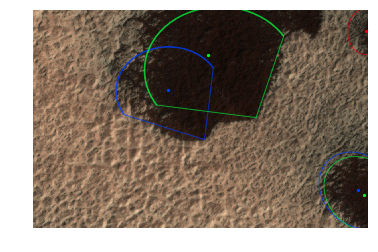

In [11]:
p4plot.plot_finals('br5', datapath=rm.savefolder)

In [14]:
fans = rm.read_fan_file()

In [29]:
obsdata = fans[fans.image_name=='ESP_012079_0945']

File not found: /Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4/ESP_012079_0945/APF0000cpv/L1C_cut_0.5/APF0000cpv_L1C_cut_0.5_blotches.csv


Text(0.5,1,'APF0000cpv')

Text(0.5,1,'APF0000cwv')

Text(0.5,1,'APF0000cj5')

Text(0.5,1,'APF0000ckn')

File not found: /Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4/ESP_012079_0945/APF0000cnt/L1C_cut_0.5/APF0000cnt_L1C_cut_0.5_blotches.csv


Text(0.5,1,'APF0000cnt')

File not found: /Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4/ESP_012079_0945/APF0000cqn/L1C_cut_0.5/APF0000cqn_L1C_cut_0.5_blotches.csv


Text(0.5,1,'APF0000cqn')

Text(0.5,1,'APF0000cn7')

File not found: /Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4/ESP_012079_0945/APF0000ct3/L1C_cut_0.5/APF0000ct3_L1C_cut_0.5_blotches.csv


Text(0.5,1,'APF0000ct3')

File not found: /Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4/ESP_012079_0945/APF0000cvd/L1C_cut_0.5/APF0000cvd_L1C_cut_0.5_blotches.csv


Text(0.5,1,'APF0000cvd')

Text(0.5,1,'APF0000cu4')

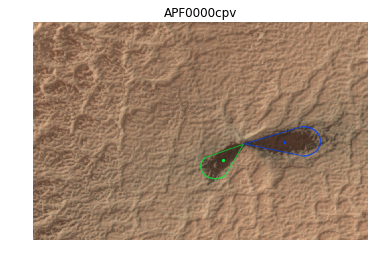

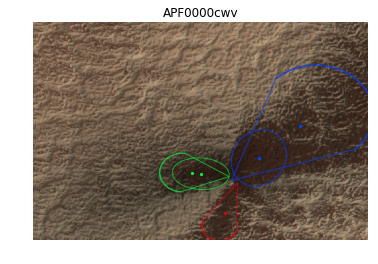

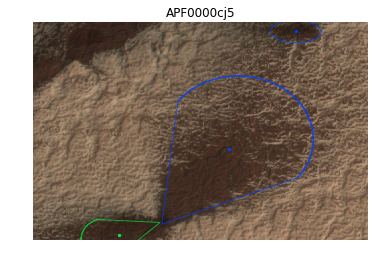

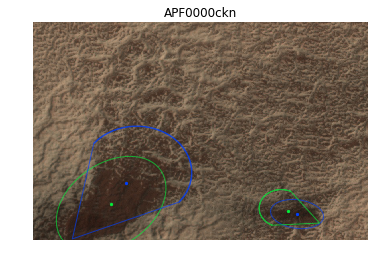

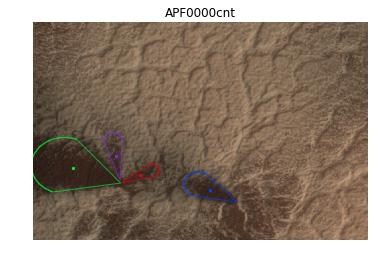

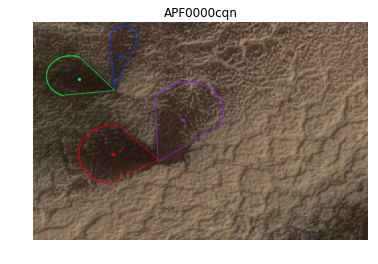

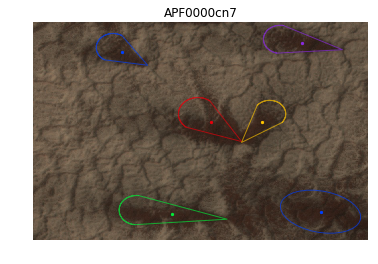

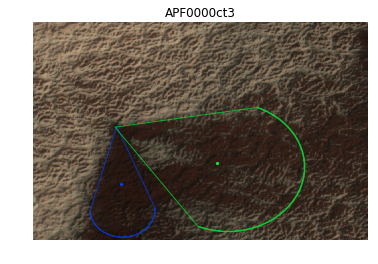

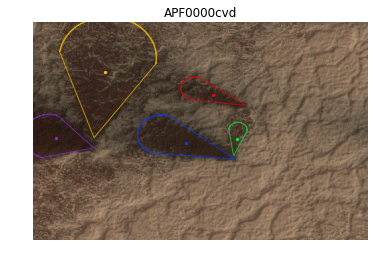

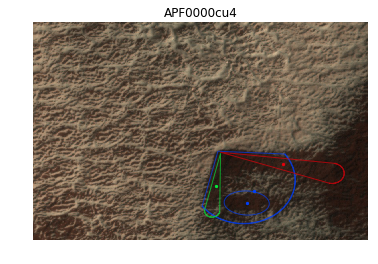

In [43]:
for ind in obsdata.groupby('image_id').angle.std().sort_values(ascending=False).head(10).index:
    p4plot.plot_finals(ind, datapath=rm.savefolder);
    plt.gca().set_title(ind);

File not found: /Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4/ESP_012079_0945/APF0000cpv/L1C_cut_0.5/APF0000cpv_L1C_cut_0.5_blotches.csv


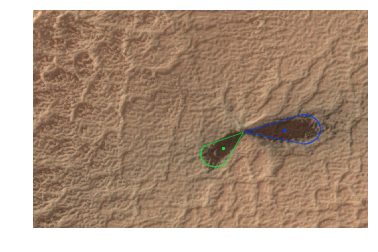

In [46]:
p4plot.plot_finals('cpv', datapath=rm.savefolder)
plt.gcf().savefig('cpv.png', dpi=150)

File not found: /Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4/ESP_012079_0945/APF0000cnt/L1C_cut_0.5/APF0000cnt_L1C_cut_0.5_blotches.csv


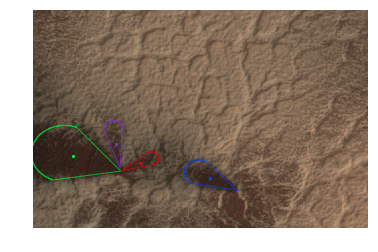

In [47]:
p4plot.plot_finals('cnt', datapath=rm.savefolder)
plt.gcf().savefig('cnt.png', dpi=150)

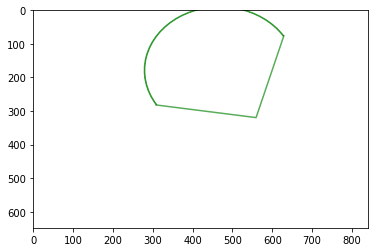

In [22]:
fan = Fan(s)

fan.plot(color='green')

In [25]:
meta = pd.read_csv(rm.metadata_path)

In [27]:
meta

0    25243
1    28616
2    24023
3    37589
4    27156
Name: lines, dtype: int64

In [2]:
%matplotlib nbagg
import seaborn as sns
sns.set_context('notebook')

In [9]:
from nbtools.logging import setup_live_logging
import logging
logger = setup_live_logging('planet4.plotting', logging.DEBUG)

In [14]:
dir_ = 'without_large_fan_fnotch_on_p4_coords'

In [15]:
kwargs = dict(datapath=dir_,
              saveroot='plots/'+dir_,
              savetitle='withLarge_hirise_coords',
              save=True)

In [ ]:
for id_ in ids:
    print(id_)
    plot_image_id_pipeline(id_, **kwargs)
    plt.close('all')

# plot cluster results with noise

In [31]:
from planet4.dbscan import DBScanner
from planet4 import markings, plotting, catalog_production

In [2]:
dbscan = DBScanner()

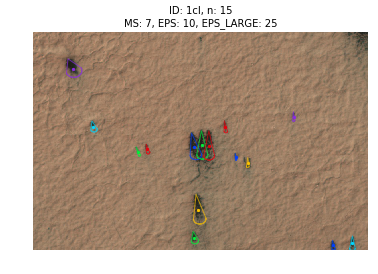

In [4]:
dbscan.cluster_and_plot('1cl', kind='fan')

In [6]:
data = dbscan.p4id.filter_data('fan')

In [14]:
fan_noise = data.loc[dbscan.noise[0]]

In [24]:
xy = fan_noise[['x','y']].values

In [19]:
rm = catalog_production.ReleaseManager('v1.0')

In [27]:
%matplotlib ipympl

In [62]:
plt.close('all')

In [68]:
fig, ax = plt.subplots(ncols=2, figsize=(8,3))
plotting.plot_raw_fans('1cl', ax=ax[0])
plotting.plot_clustered_markings('1cl', 'fan', datapath=rm.savefolder, ax=ax[1])
ax[1].plot(xy[:,0], xy[:,1], 'o', 
           markerfacecolor='white',
           markeredgecolor='black', 
           markeredgewidth=0.2,
           markersize=3)
for axis in ax:
    axis.set_aspect('equal')
ax[0].set_title("Raw markings before clustering")
ax[1].set_title("Clustered and noise markings")
fig.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/fans_clustered.png",
            dpi=150)

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

In [36]:
import seaborn as sns
sns.set_context('paper')

In [48]:
fig, axes = plt.subplots(ncols=2)
markings.ImageID('1cl').show_subframe(ax=axes[0])
plotting.plot_raw_fans('1cl', ax=axes[1])
id_ = 'APF00001cl'
axes[0].set_title(f"{id_}, original input")
axes[1].set_title(f"{id_}, Planet Four fan markings")
for ax in axes:
    ax.set_aspect('equal')
fig.tight_layout()
fig.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/fan_markings.png",
            dpi=150)

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

In [49]:
p4id = markings.ImageID('1cl')

In [50]:
p4id.n_marked_classifications

51

In [78]:
plotting.plot_image_id_pipeline('1cl', datapath=rm.savefolder,
                                figsize=(8,4))
plt.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/P4_pipeline.png",
            dpi=150)

/Users/klay6683/miniconda3/envs/stable/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

In [1]:
import matplotlib as mpl

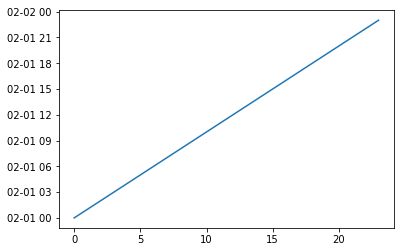

In [2]:
time = np.arange('2005-02-01', '2005-02-02', dtype='datetime64[h]')

plt.plot(time)

In [3]:
time.shape

(24,)